In [3]:
import numpy as np
import matplotlib.pyplot as plt

import PIL
import glob

In [4]:
ft = 10
import matplotlib as mpl
mpl.style.use('default')

# graphical properties
plt.rcParams["axes.edgecolor"] = "k"
plt.rcParams["axes.facecolor"] = "w"
plt.rcParams["axes.linewidth"] = "0.8"
plt.rcParams.update({'font.size': ft})
plt.rcParams['savefig.dpi'] = 300

plt.rcParams['pdf.fonttype'] = 42 # prepare as vector graphic
plt.rcParams['ps.fonttype'] = 42

plt.rcParams["font.family"] = "Helvetica"
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command

C:\Users\Heysoos\AppData\Local\Temp\ipykernel_17320\3538168403.py:17: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command


In [60]:
filenames = ['stilllifes', 'loafer_spaceship', 'pentadecathlon_oscillator']
figure_labels = ['still life', 'spaceship', 'oscillator']

# load images from ../figures/GoL/[filename]/*.png
def load_images(example):
    images = []
    for img_path in glob.glob(f"../figures/GoL/{example}/*.png"):
        img = PIL.Image.open(img_path)
        images.append(img)
    return images

dict_images = {}
for filename in filenames:
    dict_images[filename] = load_images(filename)

In [159]:
dict_images

{'stilllifes': [<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=600x640>,
  <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=600x640>,
  <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=600x640>,
  <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=600x640>,
  <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=600x640>],
 'loafer_spaceship': [<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=600x640>,
  <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=600x640>,
  <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=600x640>,
  <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=600x640>,
  <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=600x640>],
 'pentadecathlon_oscillator': [<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=600x640>,
  <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=600x640>,
  <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=600x640>,
  <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=600x640>,
  <PIL.PngI

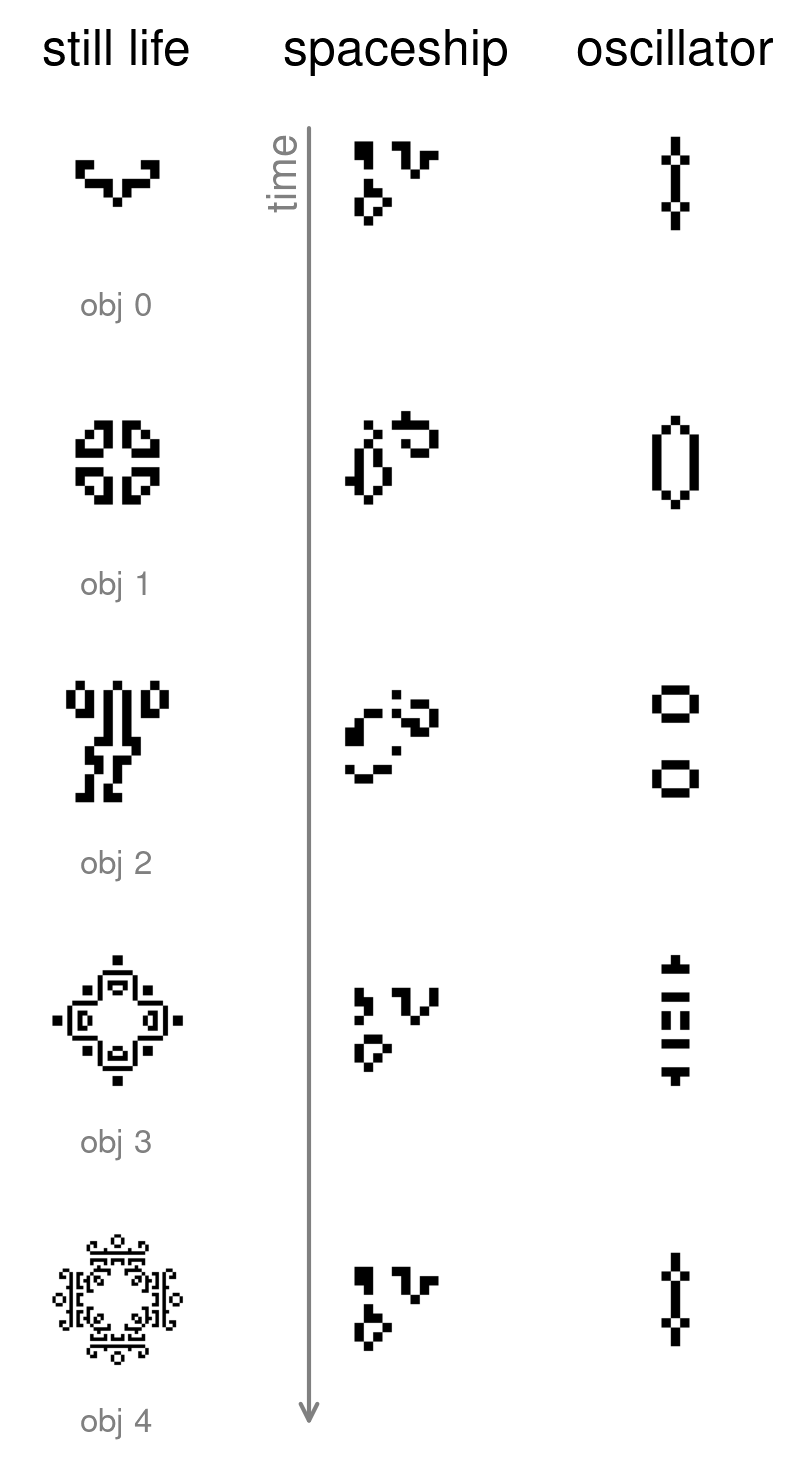

In [187]:
# plot all images ontop of each other in a grid
n_images = max([len(images) for images in dict_images.values()])
fig, axs = plt.subplots(n_images, len(filenames), figsize=(3, 5), dpi=300)

for i, filename in enumerate(filenames):
    images = dict_images[filename]
    for j, img in enumerate(images):
        axs[j, i].imshow(img)
        # axs[j, i].axis('off')
        if j == 0:
            axs[j, i].set_title(figure_labels[i])

for ax in axs.flatten():
    ax.tick_params(axis='both', left=False, top=False, right=False, bottom=False, labelleft=False, labeltop=False, labelright=False, labelbottom=False)
    ax.grid(False)
    for spine in ax.spines.values():
        spine.set_visible(False)
        
for i, ax in enumerate(axs[:, 0]):
    ax.set_xlabel(f'obj {i}', fontsize=8, color='gray')

plt.tight_layout()     

# annotate figure so that second and third columns have an arrow pointing down to represent time
ax = axs[0, 1]

bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->", edgecolor='gray')

plt.annotate('',
            xy=(0, 780), xycoords=axs[-1, 1].transData,
            xytext=(0, 100), textcoords=axs[0, 1].transData,
            ha="center", va="top",
            arrowprops=arrow_args)

plt.annotate('time',
            xy=(-80, 150), xycoords=axs[0, 1].transData,
            ha="center", va="top", rotation=90, fontsize=10, color='gray')

plt.savefig('../figures/GoL_examples.pdf', bbox_inches='tight')

In [151]:
axs[-1, 1].transData